## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Resources](#resources)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [226]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [227]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [228]:
# number of rows
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [229]:
# unique users
df.user_id.nunique()

290584

d. The proportion of users converted.

In [230]:
# proportions of users converted, regardless of group
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [231]:
# row with treatment and old page OR control and new page
df.query('(group == "treatment" & landing_page == "old_page") | (group == "control" & landing_page == "new_page")').count()[0]

3893

f. Do any of the rows have missing values?

In [232]:
# look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [233]:
# clean dataframe (no non-aligned group-landing_page combinations)
df2 = df.query('(group == "treatment" & landing_page == "new_page") | (group == "control" & landing_page == "old_page")')

In [234]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [235]:
# number of unique users
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [236]:
# find the duplicate user id
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [237]:
# compare the duplicate user rows
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [238]:
# remove duplicate
df2 = df2.drop(2893)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [239]:
# conversion probability regardless of landing page
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [240]:
# conversion probability for old page users
df2[df2['group'] == "control"].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [241]:
# conversion probability for new page users
df2[df2['group'] == "treatment"].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [242]:
# probability to see the new page
df2[df2['landing_page'] == "new_page"].count()[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

------
------

**My answer**

- There is a significative number of observations (290584) evenly divided between new page and old page. Since there are so many, I would say that it is not necessary to collect any more data if everything stays the same.

- The conversion rate is HIGHER for the CONTROL group, i.e. the one landing on the old page

- The difference between the two conversion rates is 0.001578, or the 0.158%. This suggest that if 2000 people visit the website, the old page help to convert 2 people more than the new one.

- There is not a big difference, but since there are so many observations, it may be statistically significant.

It does not really matter, because it suggest that the old page is better than the new one, therefore, if the company really wanted to change the website and improve it, they should try to understand why the new page is no better than the old one for the users they tested the pages with (e.g.: all people too accostumed to the old page; design errors in the new page; etc.). And keep using the old page meanwile.

-------
-------

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_0: p_{new}-p_{old}\leq0$

$H_1: p_{new}-p_{old}>0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [243]:
# we assume old and new convert rates under the null hypothesis are the same
df2.converted.mean()

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [244]:
# we assume old and new convert rates under the null hypothesis are the same
p_old_new = df2.converted.mean()
p_old_new

0.11959708724499628

c. What is $n_{new}$?

In [245]:
# number of new_page rows
n_new = df2[df2['landing_page']=="new_page"].count()[0]
n_new

145310

d. What is $n_{old}$?

In [246]:
# number of old_page rows
n_old = df2[df2['landing_page']=="old_page"].count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [247]:
# get all the new_page rows
df2_new = df2.query('group == "treatment"')

# new sample (of the same size) from the new_page data
new_page_converted = df2_new.sample(n_new, replace=True)

# new_page sample conversion rate
p_new = new_page_converted.converted.mean()
p_new

0.11860849218911293

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [248]:
# get all the old_page rows
df2_old = df2.query('group == "control"')

# new sample (same size) from the old_page data
old_page_converted = df2_old.sample(n_old, replace=True)

# old_page sample conversion rate
p_old = old_page_converted.converted.mean()
p_old

0.11984250450872146

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [249]:
# difference in conversion rates of the two samples
p_new - p_old

-0.0012340123196085268

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [250]:
# create an empty list
p_diffs = []

# bootstrap the df2 data divided by new and old page (using df2_new, df2_old, n_new and n_old created above)
# find the conversion rates and store the differences
for __ in range(10000):
    # new samples
    new_page_converted = df2_new.sample(n_new, replace=True)
    old_page_converted = df2_old.sample(n_old, replace=True)
    # conversion rates
    p_new = new_page_converted.converted.mean()
    p_old = old_page_converted.converted.mean()
    # store the difference
    p_diffs.append(p_new-p_old)
    
# convert the list into a numpy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [251]:
# difference between statistic means
diff_df2_means = df2_new.converted.mean() - df2_old.converted.mean()

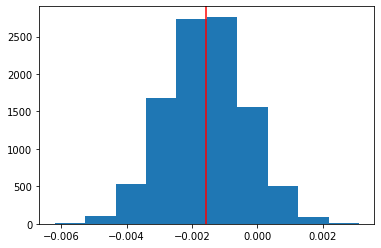

In [252]:
# plot the sampling distribution of the differences
# and the actual difference between the statistic means
plt.hist(p_diffs)
plt.axvline(x=diff_df2_means, color="r");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [253]:
(p_diffs > diff_df2_means).mean()

0.5042

In [254]:
lower_b, upper_b = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 95.5)
lower_b, upper_b

(-0.003959679112371963, 0.0005001970211421953)

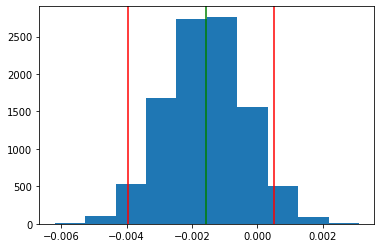

In [255]:
# plot the sampling distribution
# with the confidence interval upper and lower bounds (red)
# and the actual difference in means (green)
plt.hist(p_diffs)
plt.axvline(x=diff_df2_means, color="g")
plt.axvline(x=lower_b, color="r")
plt.axvline(x=upper_b, color="r");

---
**j2. I am a bit puzzled by j. (and k.), therefore I add a j2. under here, where I simulate the distribution of the null using the standard deviation of p_diffs and then calculate the p-value for the difference of the two statistic means.**

In [256]:
# get the standard deviation of the sampling distribution
std4null = np.std(p_diffs)
std4null

0.0012201704629757398

In [257]:
# simulate distribution for the null
null_values = np.random.normal(0, std4null, 10000)

In [258]:
# difference between statistic means from above
diff_df2_means

-0.0015782389853555567

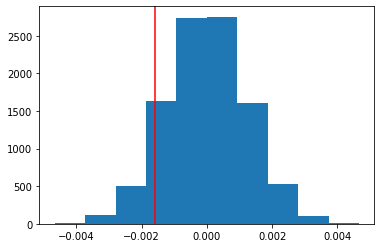

In [259]:
# plot the simulated null distribution and the difference between statistic means
plt.hist(null_values)
plt.axvline(x=diff_df2_means, color="r");

In [260]:
# p-value: probability of getting out difference in the statistic means in the simulated null
(null_values > diff_df2_means).mean()

0.9

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

---

**My answer**

The value calculated in j ( _j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?_ ) is 0.4987, almost 50%, which tells me that the actual difference observed in ab_data.csv (-0.001578) falls in the middle of the sampling distribution of the differences between means, as it can be seen on the plot.

If I add the bounds of the 95% confidence interval (lower and upper bounds: -0.00392 and 0.00044), again I see that the actual difference is about in the middle, and it appears very likely that it comes from that distribution. It is negative, so we fail to reject the null hypothesis.

I wrote that j. puzzles me, because then k. here asks for a name of that value and I don't have it. 

Therefore in j2. I simulated the normal distribution of the differences, centered in 0 (most extreme value of the null) and with the standard deviation of the sampling distribution of the differences. The actual statistic difference is again -0.001578 and the proportions of values above it is 0.9079. This is the p-value, i.e. the probability of this or more extreme values (to the right, since it is a one-sided test) to be observed, should the null hypothesis be true.

The chosen alpha is 5% (0.05), p-value is 0.9079.

Therefore p-value > alpha, so we fail to reject the null: the new page is not better than the old one for converting users.


---

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [261]:
import statsmodels.api as sm
# since I have already divided the df2 on df2_old and df2_new, I'll use those
convert_old = df2_old.converted.sum()
convert_new = df2_new.converted.sum()
# I already have these variables, but let's get them again
n_old = df2_old.shape[0]
n_new = df2_new.shape[0]

# display the variables
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [262]:
count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])

stat, pval = sm.stats.proportions_ztest(count, nobs, value=0, alternative='larger')

In [263]:
stat, pval

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

---

**My answer**

In stats.proportions_ztest I set the Alternative as p_new to be larger than p_old, with the Null as p_new minus p_old being 0 or lower.
The output says that
- the statistic is 1.31 standard deviation to the left of the mean (because _stat = -1.31_ is negative)
- the p-value is 0.905, way larger than the chosen alpha of 5% (0.05)

**Which means that we fail to reject the Null (that says that the old page conversion rate is higher or equal to the new page one) as happened in j. and k. The p-value here is very close to the one in j (0.907).**

---

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

---
**My answer**

The response variable is categorical, so I need to perform a logistic regression.

---

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [264]:
# add ab_page column (1=treatment/new_page, 0=control/old_page)
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']


In [265]:
# add intercept
df2['intercept'] = 1

In [266]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [267]:
# instantiate and fit the model 
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [268]:
# display the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 12 Mar 2020   Pseudo R-squ.:               8.077e-06
Time:                        17:42:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

---
**My answer**

The p-value assiciated with ab_page is 0.190.

_ab_page_ being 1 for the new page, the regression model baseline is that the user lands on the old page. The hypothesis here, differently from the single-sided hypotesis test of Part II, is double-sided: here the set up is
$$H_0: p_{new}-p_{old}=0$$
$$H_0: p_{new}-p_{old}\neq0$$

and gives the probability of being more than the z-score far from the center in both directions.

---

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In [269]:
# exponentiate the coefficient of ab_page, and see the reciprocal
np.exp(-0.0150), 1/np.exp(-0.0150)

(0.9851119396030626, 1.015113064615719)

---
**My answer**
Until now the question was whether or not the new_page could improve the conversion rate. It appears that it doesn't and from the regression model fitted early it seems that the explanatory variable chosen (page) is not a great predictor of the conversions: the reciprocal of the exponentiated coefficient for ab_page is 1.015, which is so close to 1 that it suggests that "old page" or "new page" is not a factor making a difference in the conversion rates.

It is a good idea to add other factors into the model if we decide we want to understand why someone converts and why someone else doesn't. It could provide insight for better designing the product/service or the webpage presenting it, or better targeting the offer.

The disadvantages are that adding variables can make it more difficult to interpret the results, above all if the variables chosen are somehow correlated.

---

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [270]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [271]:
df_new.head(2)

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1


In [272]:
### Create the necessary dummy variables
countries = pd.get_dummies(df_new['country'])

# join the dataframes
df_new = df_new.join(countries)

df_new.head(2)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1


In [273]:
# instantiate and fit the model with the country as explanatory variable (CA as baseline)
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [274]:
# display the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 Mar 2020   Pseudo R-squ.:               1.521e-05
Time:                        17:42:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [275]:
np.exp(0.0507), np.exp(0.0408)

(1.052007243765014, 1.0416437559600236)

---
**Answer to g.**

The p-values for both UK (0.074) and US (0.129) are greater than 0.05, so it seems that, by itself, the country has not an impact on the conversion rate.

---

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [276]:
# add columns for interaction between page and country:
# ab_page*CA, ab_page*UK, AB_page*US
df_new['ab_page_CA'] = df_new['ab_page']*df_new['CA']
df_new['ab_page_UK'] = df_new['ab_page']*df_new['UK']
df_new['ab_page_US'] = df_new['ab_page']*df_new['US']

df_new.head(3)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,ab_page_CA,ab_page_UK,ab_page_US
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0


In [277]:
### Fit Your Linear Model And Obtain the Results
### baseline: old page, CA

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'ab_page_UK', 'ab_page_US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 12 Mar 2020   Pseudo R-squ.:               3.482e-05
Time:                        17:42:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
ab_page_US     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

---
**Answer to h.**

It appears from the p-values that there is no interaction between ab_page and country.

---

<a id='resources'></a>
## Resources

- https://pandas.pydata.org/
- https://stackoverflow.com/
- https://stats.stackexchange.com/
- https://link.springer.com
- https://www.quora.com/
- https://www.statsmodels.org/

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.